In [6]:
library(Seurat)
library(dplyr)
library(reticulate)
library(sctransform)
library(cowplot)
library(ggplot2)
library(viridis)
library(tidyr)
library(magrittr)
library(reshape2)
library(readxl)
# library(progeny)
library(readr)
library(stringr)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite

Warning message:
“package ‘magrittr’ was built under R version 4.1.3”

Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [4]:
load("Aging_NonHematopoietic_BoneMarrow.RData")#Please download it from GEO

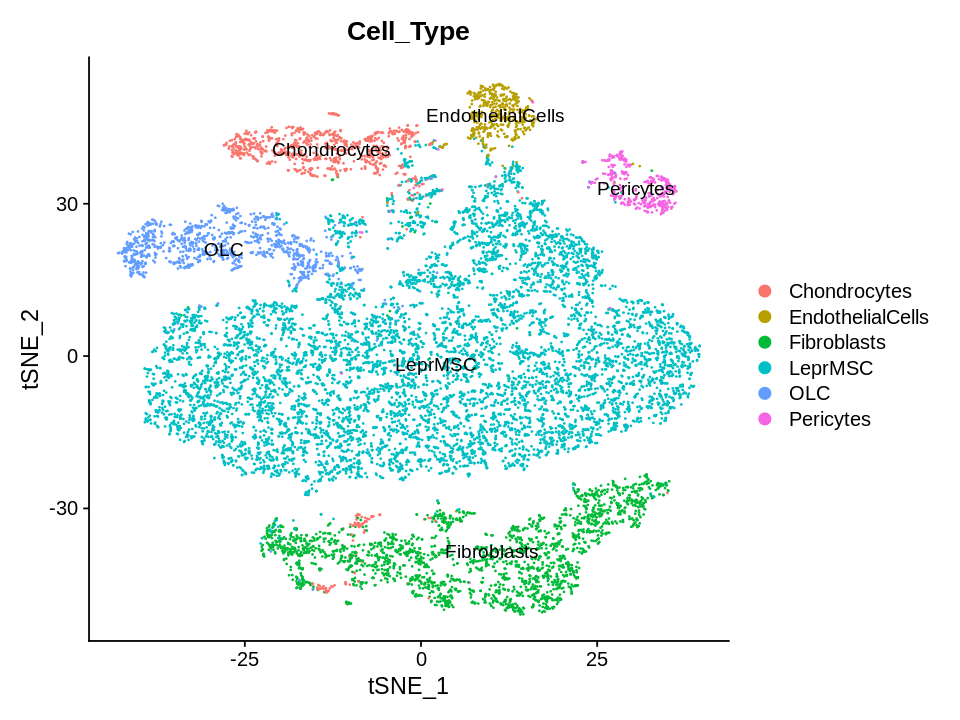

In [8]:
#Figure 1C
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(NonHematopoietic_bone_marrow, reduction = "tsne", group.by = "Cell_Type",label = TRUE)

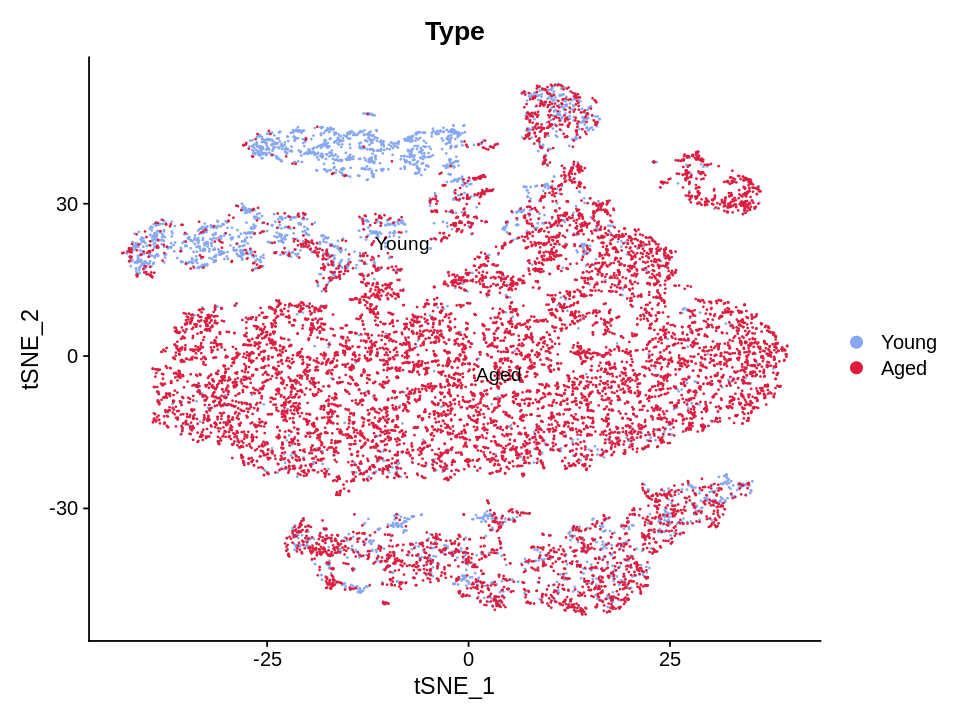

In [13]:
#Figure 1F
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(NonHematopoietic_bone_marrow, reduction = "tsne", group.by = "Type",label = TRUE,cols=c("#86A7F1","#DD1C3E"))

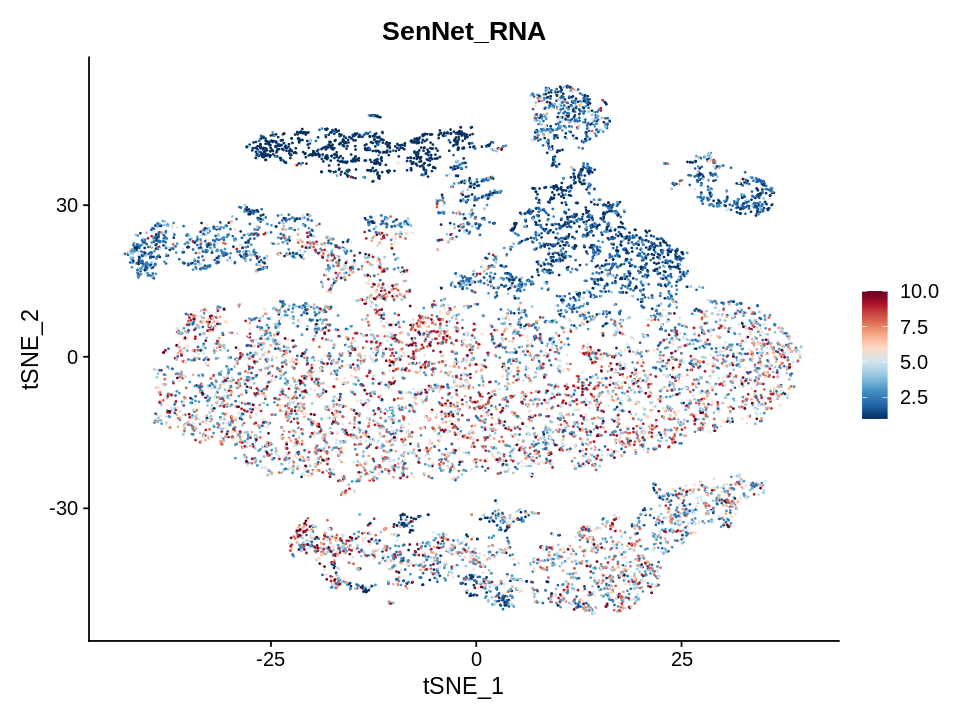

In [16]:
#Figure 1F
library(RColorBrewer)
rd_bu_r <- c(rev(brewer.pal(n = 10, name = "RdBu")))
FeaturePlot(NonHematopoietic_bone_marrow, features = "SenNet_RNA", reduction = "tsne",cols=rd_bu_r)


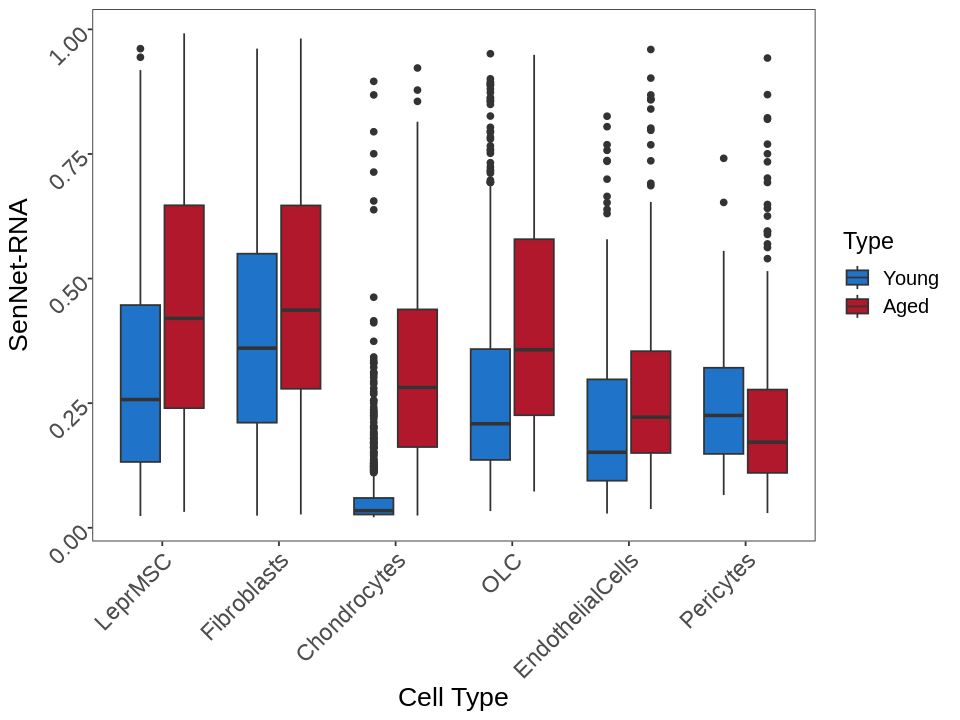

In [19]:
#Figure 1G
library(ggplot2)
library(ggpubr)


data_to_plot=NonHematopoietic_bone_marrow@meta.data

data_to_plot$Cell_Type <- factor(data_to_plot$Cell_Type, levels = c("LeprMSC","Fibroblasts","Chondrocytes","OLC","EndothelialCells","Pericytes"))


p <- ggplot(data_to_plot, aes(x = Cell_Type, y = SenNet_RNA, fill = Type)) +
  geom_boxplot() +

  scale_fill_manual(values = c("#1F74C9", "#B2182B")) +
  labs(x = "Cell Type", y = "SenNet-RNA") +
  theme_bw() +
  theme(
    axis.text = element_text(size = 14, angle = 45, hjust = 1),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 14),
      panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

[[1]]


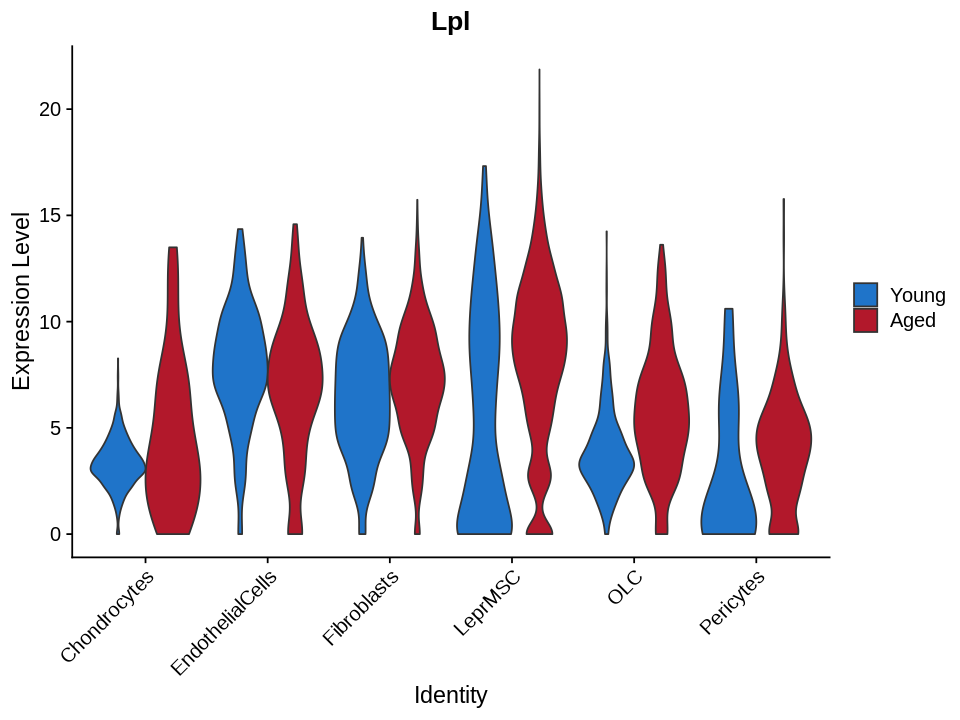

In [36]:
#Figure 1E
Type_I_Interferon=c('Gm45717','Ifi27','Ifitm1','Ifitm2','Ifitm3','Ifitm3','Ifitm6','Ifitm7','Ifna1','Ifnar1','Ifnar1','Ifnar1','Ifnar1','Ifnar2','Ifnar2','Ifnb1','Ifnb1','Irak1','Irf3','Irf7','Myd88','Oas1a','Oas1c','Oas1d','Oas1e','Oas1f','Oas1g','Oas1h','Oas2','Stat1','Stat1','Stat1','Stat2','Stat2','Stat2','Trex1')
TIF=NonHematopoietic_bone_marrow
TIF@assays$RNA@data["Lpl",]=colSums(TIF@assays$RNA@data[row.names(TIF@assays$RNA@data)%in%Type_I_Interferon,])
VlnPlot(TIF, features = c("Lpl"), split.by = "Type", group.by = "Cell_Type",pt.size = 0, combine = FALSE,cols=c("#1F74C9", "#B2182B"))



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


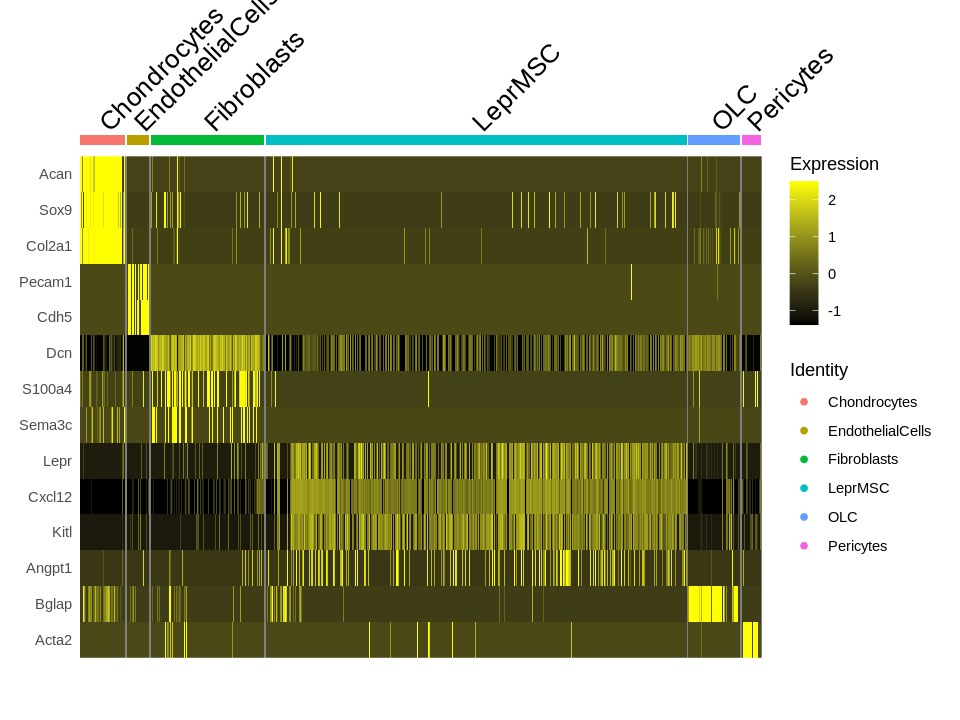

In [23]:
#Figure Supplementary 1A
NonHematopoietic_bone_marrow <- ScaleData(
  NonHematopoietic_bone_marrow,
  assay = "RNA",
  features = rownames(NonHematopoietic_bone_marrow)
)

DoHeatmap(
  NonHematopoietic_bone_marrow,
  features = c("Acan","Sox9","Col2a1","Pecam1","Cdh5","Dcn","S100a4","Sema3c","Lepr","Cxcl12","Kitl","Angpt1","Bglap","Acta2"),
  cells = NULL,
  group.by = "Cell_Type",
  group.bar = TRUE,
  group.colors = NULL,
  disp.min = -2.5,
  disp.max = NULL,
  slot = "scale.data",
  assay = NULL,
  label = TRUE,
  size = 5.5,
  hjust = 0,
  angle = 45,
  raster = TRUE,
  draw.lines = TRUE,
  lines.width = NULL,
  group.bar.height = 0.02,
  combine = TRUE
)+ scale_fill_gradientn(colors = c("black", "yellow"))

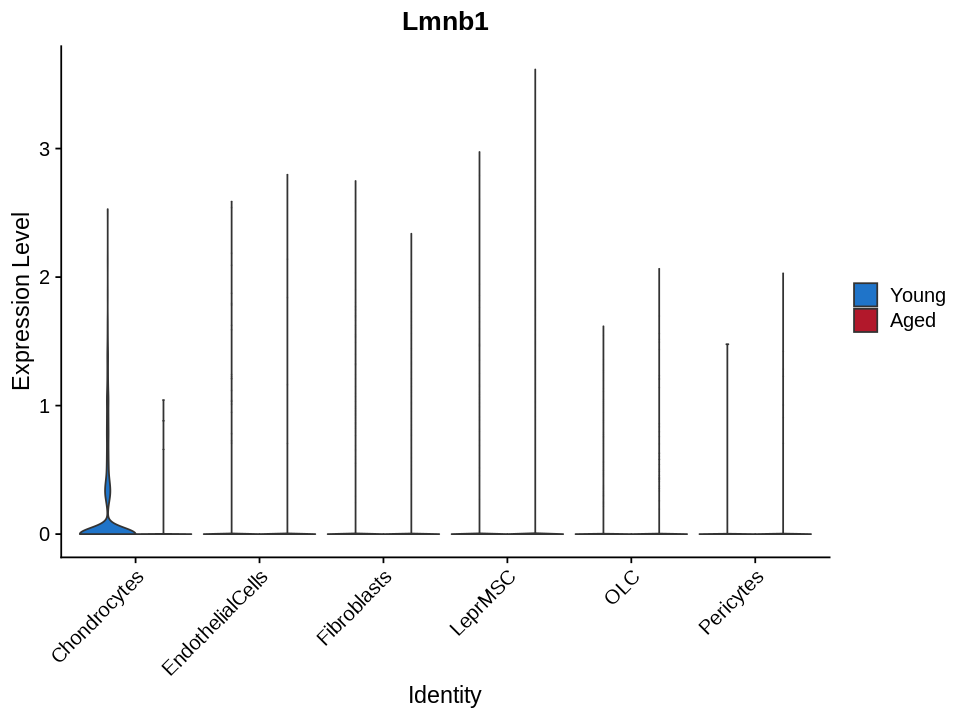

[[1]]

[[2]]

[[3]]


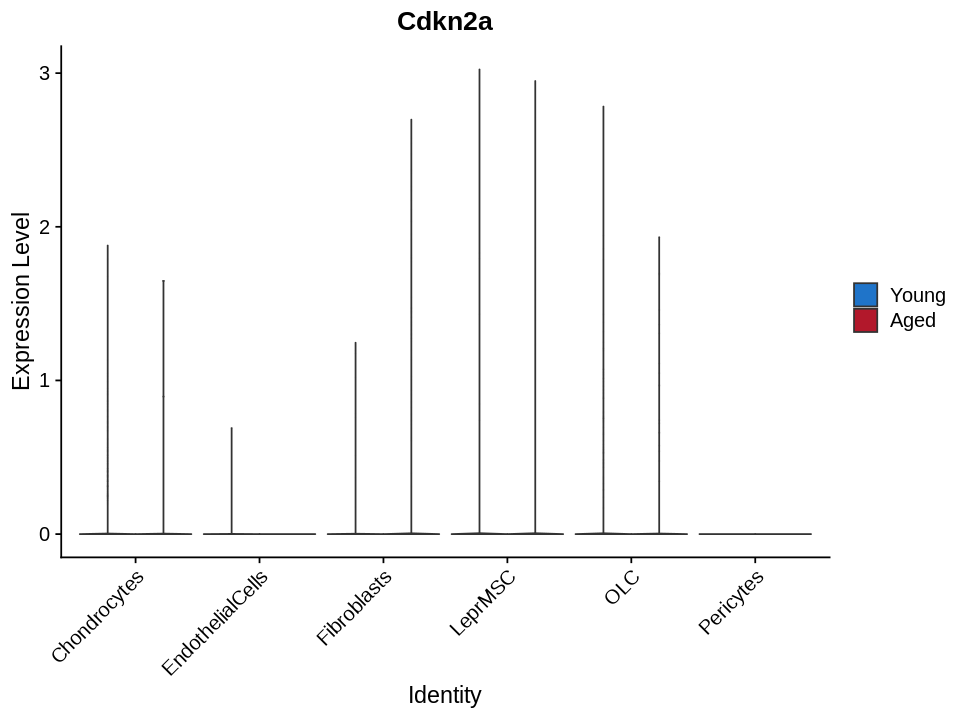

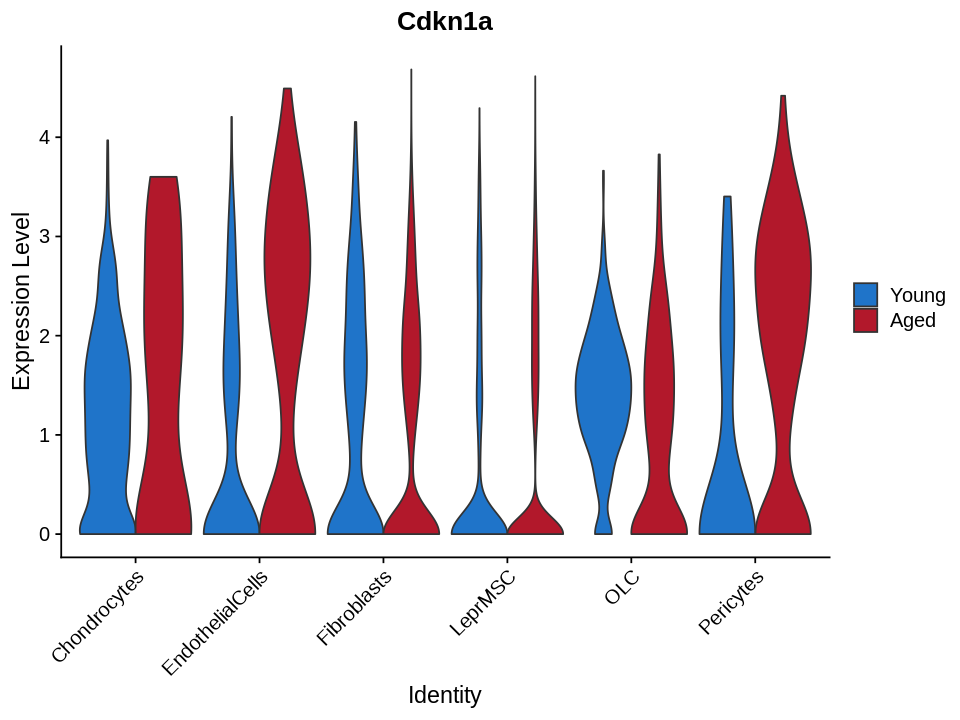

In [38]:
#Figure Supplementary 1C
VlnPlot(NonHematopoietic_bone_marrow, features = c("Lmnb1","Cdkn2a","Cdkn1a"), split.by = "Type", group.by = "Cell_Type",pt.size = 0, combine = FALSE,cols=c("#1F74C9", "#B2182B"))

In [39]:
DefaultAssay(NonHematopoietic_bone_marrow)="RNA"
CellType=c("LeprMSC","Fibroblasts","Chondrocytes","EndothelialCells","Pericytes","OLC")

DEG_YvsO=list()
for (i in c(1:length(CellType))){
    print(i)
    print(CellType[i])
    Idents(NonHematopoietic_bone_marrow) <- "Cell_Type"
    sub.Y_list.combined_sub <- subset(NonHematopoietic_bone_marrow, idents = CellType[i])
    Idents(sub.Y_list.combined_sub) <-"Type" 
    tryCatch({DEG_YvsO[[CellType[i]]] <- FindMarkers(sub.Y_list.combined_sub, ident.1 = "Aged", ident.2 = "Young", verbose = FALSE)}, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}  )
}



[1] 1
[1] "LeprMSC"
[1] 2
[1] "Fibroblasts"
[1] 3
[1] "Chondrocytes"
[1] 4
[1] "EndothelialCells"
[1] 5
[1] "Pericytes"
[1] 6
[1] "OLC"


In [40]:
library(enrichR)
dbs <- listEnrichrDbs()



data=DEG_YvsO[[c("LeprMSC")]]
LeprMSC_enriched_up <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC>1]), c("GO_Biological_Process_2025"))
LeprMSC_enriched_down <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC< -1]), c("GO_Biological_Process_2025"))

data=DEG_YvsO[[c("Chondrocytes")]]
Chondrocytes_enriched_up <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC>1]), c("GO_Biological_Process_2025"))
Chondrocytes_enriched_down <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC< -1]), c("GO_Biological_Process_2025"))

data=DEG_YvsO[[c("EndothelialCells")]]
EndothelialCells_enriched_up <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC>1]), c("GO_Biological_Process_2025"))
EndothelialCells_enriched_down <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC< -1]), c("GO_Biological_Process_2025"))

data=DEG_YvsO[[c("Fibroblasts")]]
Fibroblasts_enriched_up <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC>1]), c("GO_Biological_Process_2025"))
Fibroblasts_enriched_down <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC< -1]), c("GO_Biological_Process_2025"))

data=DEG_YvsO[[c("OLC")]]
OLC_enriched_up <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC>1]), c("GO_Biological_Process_2025"))
OLC_enriched_down <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC< -1]), c("GO_Biological_Process_2025"))

data=DEG_YvsO[[c("Pericytes")]]
Pericytes_enriched_up <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC>1]), c("GO_Biological_Process_2025"))
Pericytes_enriched_down <- enrichr(as.character(rownames(data)[data$p_val_adj<0.05&data$avg_log2FC< -1]), c("GO_Biological_Process_2025"))



Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2025... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

Thi

[1] 363

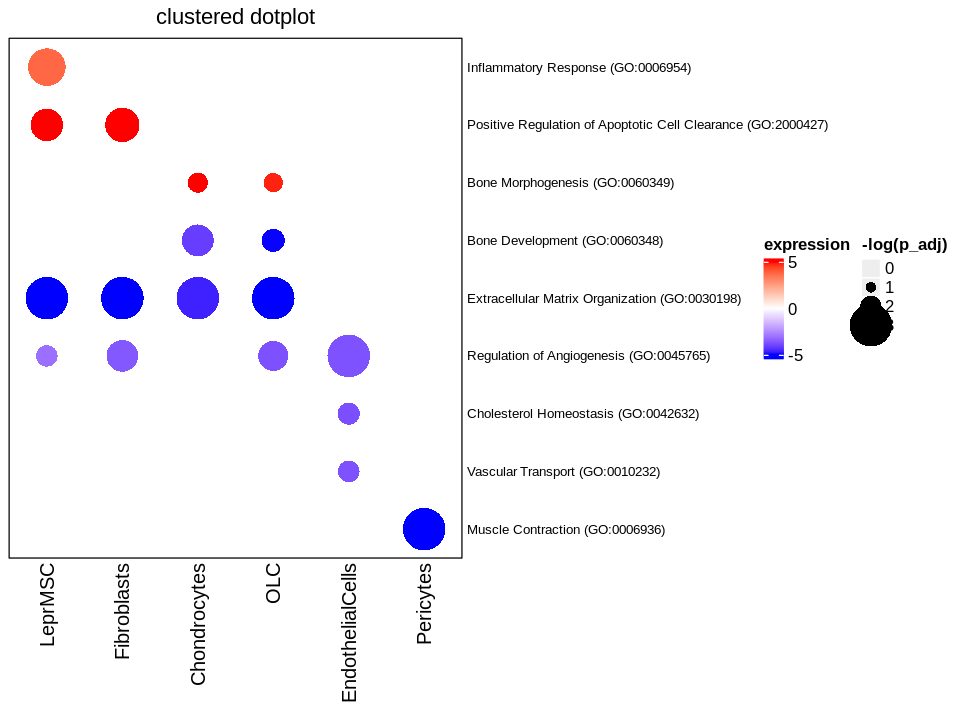

In [41]:
#Figure 1D
library("ComplexHeatmap")
library(circlize)
GO=list(LeprMSC_enriched_up=LeprMSC_enriched_up,LeprMSC_enriched_down=LeprMSC_enriched_down,
       Chondrocytes_enriched_up=Chondrocytes_enriched_up,Chondrocytes_enriched_down=Chondrocytes_enriched_down,
        EndothelialCells_enriched_up=EndothelialCells_enriched_up,EndothelialCells_enriched_down=EndothelialCells_enriched_down,
        Fibroblasts_enriched_up=Fibroblasts_enriched_up,Fibroblasts_enriched_down=Fibroblasts_enriched_down,
        OLC_enriched_up=OLC_enriched_up,OLC_enriched_down=OLC_enriched_down,
       Pericytes_enriched_up=Pericytes_enriched_up,Pericytes_enriched_down=Pericytes_enriched_down)
Sign=c()
for (i in names(GO)){
    data=GO[[i]][["GO_Biological_Process_2025"]]
    Sign=c(Sign,data[data$Adjusted.P.value<0.05,]$Term)
}
Sign=table(Sign)
Sign=names(Sign)
# Sign
length(Sign)

Sign_max=matrix(0,nrow=length(Sign),ncol=length(CellType))
Sign_pvalue=matrix(0,nrow=length(Sign),ncol=length(CellType))
row.names(Sign_max)=Sign
colnames(Sign_max)=CellType
row.names(Sign_pvalue)=Sign
colnames(Sign_pvalue)=CellType

data=LeprMSC_enriched_up[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"LeprMSC"]=log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"LeprMSC"]=log10(data$Adjusted.P.value)
data=LeprMSC_enriched_down[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"LeprMSC"]=-log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"LeprMSC"]=log10(data$Adjusted.P.value)

data=Chondrocytes_enriched_up[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"Chondrocytes"]=log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"Chondrocytes"]=log10(data$Adjusted.P.value)
data=Chondrocytes_enriched_down[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"Chondrocytes"]=-log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"Chondrocytes"]=log10(data$Adjusted.P.value)

data=EndothelialCells_enriched_up[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"EndothelialCells"]=log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"EndothelialCells"]=log10(data$Adjusted.P.value)
data=EndothelialCells_enriched_down[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"EndothelialCells"]=-log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"EndothelialCells"]=log10(data$Adjusted.P.value)

data=Fibroblasts_enriched_up[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"Fibroblasts"]=log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"Fibroblasts"]=log10(data$Adjusted.P.value)
data=Fibroblasts_enriched_down[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"Fibroblasts"]=-log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"Fibroblasts"]=log10(data$Adjusted.P.value)

data=OLC_enriched_up[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"OLC"]=log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"OLC"]=log10(data$Adjusted.P.value)
data=OLC_enriched_down[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"OLC"]=-log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"OLC"]=log10(data$Adjusted.P.value)

data=Pericytes_enriched_up[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"Pericytes"]=log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"Pericytes"]=log10(data$Adjusted.P.value)
data=Pericytes_enriched_down[["GO_Biological_Process_2025"]]
data=data[data$Adjusted.P.value<0.05,]
Sign_max[data$Term,"Pericytes"]=-log2(data$Odds.Ratio)
Sign_pvalue[data$Term,"Pericytes"]=log10(data$Adjusted.P.value)

Sign_max=Sign_max[,c("LeprMSC","Fibroblasts","Chondrocytes","OLC","EndothelialCells","Pericytes")]

Sign_pvalue=Sign_pvalue[,c("LeprMSC","Fibroblasts","Chondrocytes","OLC","EndothelialCells","Pericytes")]
Sign_pvalue=-Sign_pvalue
Sign_pvalue <- Sign_pvalue[order(rowSums(Sign_max), decreasing = TRUE), ]
Sign_max <- Sign_max[order(rowSums(Sign_max), decreasing = TRUE), ]

Sign_max=Sign_max[c("Inflammatory Response (GO:0006954)","Positive Regulation of Apoptotic Cell Clearance (GO:2000427)",
          "Bone Morphogenesis (GO:0060349)","Bone Development (GO:0060348)","Extracellular Matrix Organization (GO:0030198)","Regulation of Angiogenesis (GO:0045765)","Cholesterol Homeostasis (GO:0042632)","Vascular Transport (GO:0010232)","Muscle Contraction (GO:0006936)"),]
Sign_pvalue=Sign_pvalue[c("Inflammatory Response (GO:0006954)","Positive Regulation of Apoptotic Cell Clearance (GO:2000427)",
          "Bone Morphogenesis (GO:0060349)","Bone Development (GO:0060348)","Extracellular Matrix Organization (GO:0030198)","Regulation of Angiogenesis (GO:0045765)","Cholesterol Homeostasis (GO:0042632)","Vascular Transport (GO:0010232)","Muscle Contraction (GO:0006936)"),]



Sign_pvalue[Sign_pvalue>3]=3


col_fun = circlize::colorRamp2(c(-5, 0, 5), c("blue","white","red"))


max_pval <- 3  # cap for visualization
scale_size <- function(val, max_val = max_pval, max_size_mm = 12) {
  scaled <- pmin(val, max_val) / max_val
  scaled * unit(max_size_mm, "mm")
}

layer_fun2 = function(j, i, x, y, w, h, fill){
  grid.rect(x = x, y = y, width = w, height = h, 
            gp = gpar(col = NA, fill = NA))
  
  pval <- pindex(Sign_pvalue, i, j)  # assumed to be -log10(p)
  size_val <- scale_size(pval)

  grid.points(x = x, y = y, 
              gp = gpar(col = col_fun(pindex(Sign_max, i, j))),
              size = size_val,
              pch = 16)
}

#c(0,as.numeric(quantile(as.integer(Sign_pvalue[Sign_pvalue>0]))))
lgd_list2 = list(
    Legend( labels =c(0,1,2,3), title = "-log(p_adj)", type = "points", pch = 16, size = c(0,0.25,0.5,1) * unit(12,"mm"),
        legend_gp = gpar(col = "black")))

hp2=Heatmap(Sign_max,
        heatmap_legend_param=list(title="expression"),
        column_title = "clustered dotplot", 
        col=col_fun,
         cluster_rows = FALSE,cluster_columns = FALSE,row_order = row.names(Sign_max),
        rect_gp = gpar(type = "none"),
        cell_fun = layer_fun2,
        row_names_gp = gpar(fontsize = 8),
        border = "black")
draw( hp2, annotation_legend_list = lgd_list2)